# Create trading Algorithm using Bitcoin daily data from yfinance from 9-10-2013 - 9-10-2023


In [1]:
# Superivised Machine Learning Modules
    # Logistic Regression
    # Linear Regression
    # K-nearest neighbors
    # Decision Trees
    # Random Forests
    # SVM
    # Neural Networks
    
    

In [2]:
# Create machine learning trading algo to optimise for returns
# Each team member use different ML module and try and create a trading strategy using Bitcoin daily data from dates above to generate a profitable strategy. 

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from pathlib import Path
import talib
from pandas.tseries.offsets import DateOffset

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
#Import data

btc_data = pd.read_csv(Path("BTC-AUD.csv"),
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True)

# Print the historical data
btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,416.601227,95458918
2014-10-10,416.214355,427.426758,405.331879,416.306274,416.306274,50277145
2014-10-11,416.075989,422.787567,409.845703,417.154877,417.154877,15365803
2014-10-12,417.508331,437.739990,410.067963,436.267151,436.267151,20229111
2014-10-13,435.543365,453.506134,422.562439,446.136444,446.136444,40248429
...,...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,43926.378906,17607838598
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,43045.859375,18648535373
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,43775.996094,21134698079


In [5]:
# Delete Close and using adj close
del btc_data['Close']
btc_data

,Open,High,Low,Adj Close,Volume
Date,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,95458918
2014-10-10,416.214355,427.426758,405.331879,416.306274,50277145
2014-10-11,416.075989,422.787567,409.845703,417.154877,15365803
2014-10-12,417.508331,437.739990,410.067963,436.267151,20229111
2014-10-13,435.543365,453.506134,422.562439,446.136444,40248429
...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079


In [6]:
# add pct_change to daily Adj close
btc_data['Daily Returns'] = btc_data['Adj Close'].pct_change()
btc_data

,Open,High,Low,Adj Close,Volume,Daily Returns
Date,,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,95458918,NaN
2014-10-10,416.214355,427.426758,405.331879,416.306274,50277145,-0.000708
2014-10-11,416.075989,422.787567,409.845703,417.154877,15365803,0.002038
2014-10-12,417.508331,437.739990,410.067963,436.267151,20229111,0.045816
2014-10-13,435.543365,453.506134,422.562439,446.136444,40248429,0.022622
...,...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962


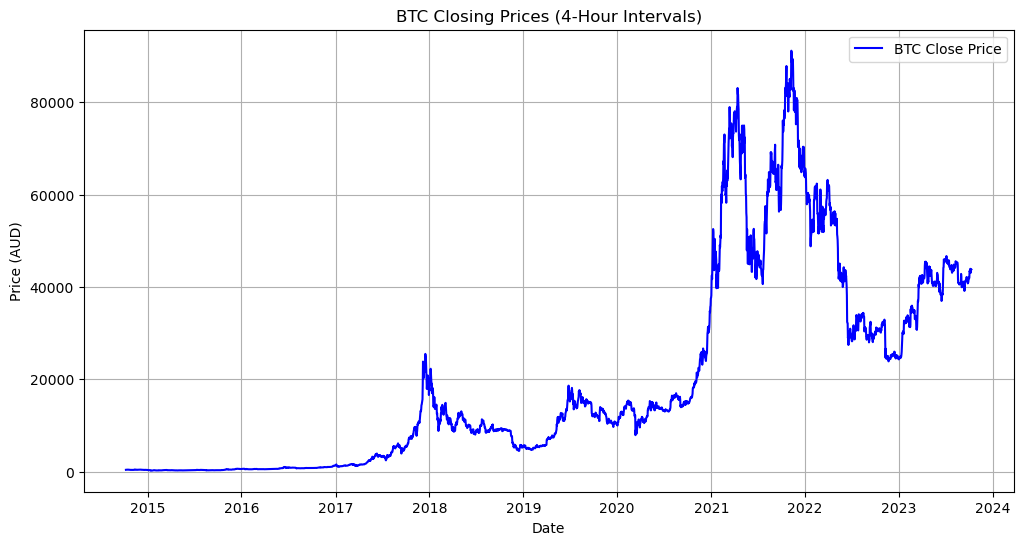

In [7]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Adj Close'], label='BTC Close Price', color='blue')
plt.title('BTC Closing Prices (4-Hour Intervals)')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [8]:
#Create new dataframe for signals
signals_df = btc_data

# Set the moving average window
ma_period = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['MA_period'] = signals_df['Adj Close'].rolling(window=ma_period).mean()

# Review the DataFrame
signals_df


,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period
Date,,,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,95458918,NaN,NaN
2014-10-10,416.214355,427.426758,405.331879,416.306274,50277145,-0.000708,NaN
2014-10-11,416.075989,422.787567,409.845703,417.154877,15365803,0.002038,NaN
2014-10-12,417.508331,437.739990,410.067963,436.267151,20229111,0.045816,NaN
2014-10-13,435.543365,453.506134,422.562439,446.136444,40248429,0.022622,NaN
...,...,...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259,43031.339336
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045,43002.548008
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962,42984.380391


In [9]:
# Add MACD
MACD_FAST = 12
MACD_SLOW = 26
MACD_SIGNAL = 9

signals_df['macd'], signals_df['macdSignal'], signals_df['macdHist'] = talib.MACD(signals_df['Adj Close'], fastperiod=MACD_FAST, slowperiod=MACD_SLOW, signalperiod=MACD_SIGNAL)
signals_df

,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist
Date,,,,,,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,95458918,NaN,NaN,NaN,NaN,NaN
2014-10-10,416.214355,427.426758,405.331879,416.306274,50277145,-0.000708,NaN,NaN,NaN,NaN
2014-10-11,416.075989,422.787567,409.845703,417.154877,15365803,0.002038,NaN,NaN,NaN,NaN
2014-10-12,417.508331,437.739990,410.067963,436.267151,20229111,0.045816,NaN,NaN,NaN,NaN
2014-10-13,435.543365,453.506134,422.562439,446.136444,40248429,0.022622,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259,43031.339336,562.980640,271.561881,291.418759
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045,43002.548008,564.027279,330.054961,233.972319
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962,42984.380391,616.664159,387.376800,229.287359


In [10]:
#RSI Indicators
signals_df['RSI_Fast'] = talib.RSI(signals_df['Adj Close'],5)
signals_df['RSI_Slow'] = talib.RSI(signals_df['Adj Close'],8)

signals_df

,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow
Date,,,,,,,,,,,,
2014-10-09,399.171661,435.658539,391.848328,416.601227,95458918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-10,416.214355,427.426758,405.331879,416.306274,50277145,-0.000708,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-11,416.075989,422.787567,409.845703,417.154877,15365803,0.002038,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-12,417.508331,437.739990,410.067963,436.267151,20229111,0.045816,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-13,435.543365,453.506134,422.562439,446.136444,40248429,0.022622,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259,43031.339336,562.980640,271.561881,291.418759,85.239675,78.700230
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045,43002.548008,564.027279,330.054961,233.972319,55.582341,59.878728
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962,42984.380391,616.664159,387.376800,229.287359,67.355152,67.291714


In [11]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Daily Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Daily Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
signals_df = signals_df.dropna()
display(signals_df.head(10))
display(signals_df.tail(10))

,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow,Signal
Date,,,,,,,,,,,,,
2015-01-16,254.312134,269.673859,243.000854,253.036240,46718142,-0.008687,404.683580,-36.792825,-26.597234,-10.195591,31.266471,30.293636,-1.0
2015-01-17,252.716446,257.455017,236.958908,242.290848,28538059,-0.042466,402.940476,-38.771560,-29.032099,-9.739461,28.097603,28.248637,-1.0
2015-01-18,243.251465,265.922913,236.510208,255.793518,36586526,0.055729,401.335349,-38.802875,-30.986254,-7.816621,37.972195,34.589901,1.0
2015-01-19,257.170135,263.980499,252.180984,262.313507,22779026,0.025489,399.786935,-37.865097,-32.362023,-5.503075,42.720234,37.631688,1.0
2015-01-20,259.927979,263.356171,250.339233,258.901001,29467165,-0.013009,398.013273,-36.971083,-33.283835,-3.687248,40.682837,36.613236,-1.0
2015-01-21,258.978210,281.636993,257.074005,280.085175,36939390,0.081823,396.352761,-34.159416,-33.458951,-0.700465,56.705182,46.823496,1.0
2015-01-22,280.609802,293.050201,280.378906,291.247833,41857499,0.039855,394.662300,-30.676794,-32.902520,2.225726,63.244521,51.525664,1.0
2015-01-23,291.386322,296.558899,280.583099,294.634369,31150936,0.011628,393.117483,-27.328499,-31.787716,4.459216,65.235784,52.967630,1.0
2015-01-24,294.407898,314.030884,291.019745,313.571594,31354378,0.064274,391.890603,-22.883094,-30.006791,7.123697,74.784495,60.480522,1.0


,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow,Signal
Date,,,,,,,,,,,,,
2023-09-30,42048.113281,41988.441406,41332.902344,41866.457031,16173692931,-0.004199,43138.681563,95.757644,-8.280642,104.038286,65.232767,60.849838,-1.0
2023-10-01,41866.406250,42146.597656,41831.058594,41953.878906,8293684202,0.002088,43115.690860,131.524462,19.680379,111.844083,67.498990,62.274514,1.0
2023-10-02,41953.074219,43616.652344,41949.488281,43471.664063,14763965082,0.036177,43090.843516,279.124923,71.569288,207.555635,86.539781,78.092637,1.0
2023-10-03,43460.867188,44694.042969,42971.960938,43274.898438,31112147242,-0.004526,43067.069766,375.888995,132.433229,243.455766,79.036286,73.525055,-1.0
2023-10-04,43239.476563,43790.359375,43164.714844,43480.300781,18082959764,0.004746,43045.650313,463.803040,198.707191,265.095848,81.167037,75.251948,1.0
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259,43031.339336,562.980640,271.561881,291.418759,85.239675,78.700230,1.0
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045,43002.548008,564.027279,330.054961,233.972319,55.582341,59.878728,-1.0
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962,42984.380391,616.664159,387.376800,229.287359,67.355152,67.291714,1.0
2023-10-08,43776.285156,43903.652344,43656.675781,43810.835938,10264793466,0.000796,42962.390703,653.655615,440.632563,213.023052,67.863205,67.617991,1.0


In [12]:
signals_df['Signal'].value_counts()

 1.0    1687
-1.0    1502
Name: Signal, dtype: int64

In [13]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Signal_shift'] = signals_df['Signal'].shift()
signals_df['Plus1_Minus1_Strategy'] = signals_df['Daily Returns'] * signals_df['Signal_shift']

# Review the DataFrame
display(signals_df.head(10))
display(signals_df.tail(10))

C:\Users\duke_\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\duke_\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow,Signal,Signal_shift,Plus1_Minus1_Strategy
Date,,,,,,,,,,,,,,,
2015-01-16,254.312134,269.673859,243.000854,253.036240,46718142,-0.008687,404.683580,-36.792825,-26.597234,-10.195591,31.266471,30.293636,-1.0,NaN,NaN
2015-01-17,252.716446,257.455017,236.958908,242.290848,28538059,-0.042466,402.940476,-38.771560,-29.032099,-9.739461,28.097603,28.248637,-1.0,-1.0,0.042466
2015-01-18,243.251465,265.922913,236.510208,255.793518,36586526,0.055729,401.335349,-38.802875,-30.986254,-7.816621,37.972195,34.589901,1.0,-1.0,-0.055729
2015-01-19,257.170135,263.980499,252.180984,262.313507,22779026,0.025489,399.786935,-37.865097,-32.362023,-5.503075,42.720234,37.631688,1.0,1.0,0.025489
2015-01-20,259.927979,263.356171,250.339233,258.901001,29467165,-0.013009,398.013273,-36.971083,-33.283835,-3.687248,40.682837,36.613236,-1.0,1.0,-0.013009
2015-01-21,258.978210,281.636993,257.074005,280.085175,36939390,0.081823,396.352761,-34.159416,-33.458951,-0.700465,56.705182,46.823496,1.0,-1.0,-0.081823
2015-01-22,280.609802,293.050201,280.378906,291.247833,41857499,0.039855,394.662300,-30.676794,-32.902520,2.225726,63.244521,51.525664,1.0,1.0,0.039855
2015-01-23,291.386322,296.558899,280.583099,294.634369,31150936,0.011628,393.117483,-27.328499,-31.787716,4.459216,65.235784,52.967630,1.0,1.0,0.011628
2015-01-24,294.407898,314.030884,291.019745,313.571594,31354378,0.064274,391.890603,-22.883094,-30.006791,7.123697,74.784495,60.480522,1.0,1.0,0.064274


,Open,High,Low,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow,Signal,Signal_shift,Plus1_Minus1_Strategy
Date,,,,,,,,,,,,,,,
2023-09-30,42048.113281,41988.441406,41332.902344,41866.457031,16173692931,-0.004199,43138.681563,95.757644,-8.280642,104.038286,65.232767,60.849838,-1.0,1.0,-0.004199
2023-10-01,41866.406250,42146.597656,41831.058594,41953.878906,8293684202,0.002088,43115.690860,131.524462,19.680379,111.844083,67.498990,62.274514,1.0,-1.0,-0.002088
2023-10-02,41953.074219,43616.652344,41949.488281,43471.664063,14763965082,0.036177,43090.843516,279.124923,71.569288,207.555635,86.539781,78.092637,1.0,1.0,0.036177
2023-10-03,43460.867188,44694.042969,42971.960938,43274.898438,31112147242,-0.004526,43067.069766,375.888995,132.433229,243.455766,79.036286,73.525055,-1.0,1.0,-0.004526
2023-10-04,43239.476563,43790.359375,43164.714844,43480.300781,18082959764,0.004746,43045.650313,463.803040,198.707191,265.095848,81.167037,75.251948,1.0,-1.0,-0.004746
2023-10-05,43478.867188,43997.480469,43171.464844,43926.378906,17607838598,0.010259,43031.339336,562.980640,271.561881,291.418759,85.239675,78.700230,1.0,1.0,0.010259
2023-10-06,43925.199219,44230.550781,43056.265625,43045.859375,18648535373,-0.020045,43002.548008,564.027279,330.054961,233.972319,55.582341,59.878728,-1.0,1.0,-0.020045
2023-10-07,43039.910156,44255.226563,43024.632813,43775.996094,21134698079,0.016962,42984.380391,616.664159,387.376800,229.287359,67.355152,67.291714,1.0,-1.0,-0.016962
2023-10-08,43776.285156,43903.652344,43656.675781,43810.835938,10264793466,0.000796,42962.390703,653.655615,440.632563,213.023052,67.863205,67.617991,1.0,1.0,0.000796


<AxesSubplot:xlabel='Date'>

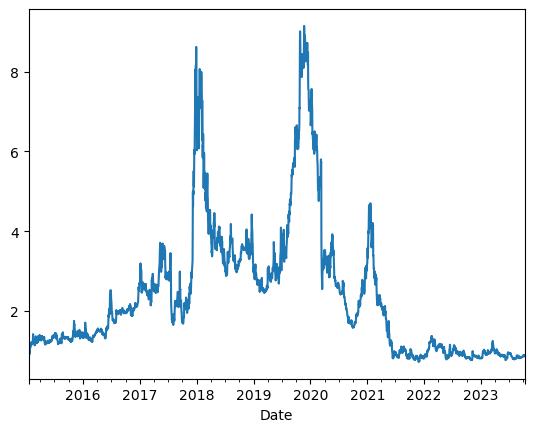

In [14]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Plus1_Minus1_Strategy']).cumprod().plot()


<AxesSubplot:xlabel='Date'>

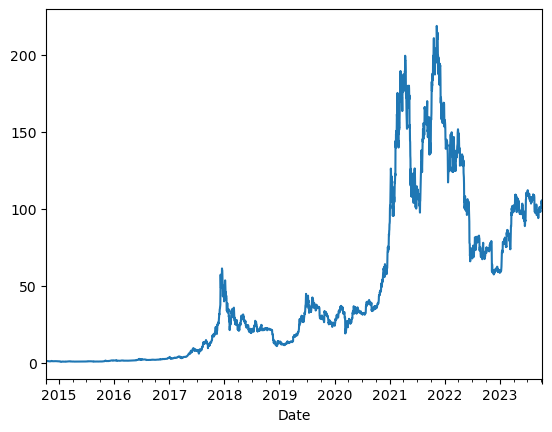

In [15]:
(1 + btc_data['Daily Returns']).cumprod().plot()

### Split the data into training and testing datasets.

In [45]:
# Copy the DataFrame 
X = signals_df.iloc[:,3:12]
X


,Adj Close,Volume,Daily Returns,MA_period,macd,macdSignal,macdHist,RSI_Fast,RSI_Slow
Date,,,,,,,,,
2015-01-16,253.036240,46718142,-0.008687,404.683580,-36.792825,-26.597234,-10.195591,31.266471,30.293636
2015-01-17,242.290848,28538059,-0.042466,402.940476,-38.771560,-29.032099,-9.739461,28.097603,28.248637
2015-01-18,255.793518,36586526,0.055729,401.335349,-38.802875,-30.986254,-7.816621,37.972195,34.589901
2015-01-19,262.313507,22779026,0.025489,399.786935,-37.865097,-32.362023,-5.503075,42.720234,37.631688
2015-01-20,258.901001,29467165,-0.013009,398.013273,-36.971083,-33.283835,-3.687248,40.682837,36.613236
...,...,...,...,...,...,...,...,...,...
2023-10-05,43926.378906,17607838598,0.010259,43031.339336,562.980640,271.561881,291.418759,85.239675,78.700230
2023-10-06,43045.859375,18648535373,-0.020045,43002.548008,564.027279,330.054961,233.972319,55.582341,59.878728
2023-10-07,43775.996094,21134698079,0.016962,42984.380391,616.664159,387.376800,229.287359,67.355152,67.291714


In [46]:
# Assign y df to keep df the same size
y = signals_df['Signal']

#Display Y
y

Date
2015-01-16   -1.0
2015-01-17   -1.0
2015-01-18    1.0
2015-01-19    1.0
2015-01-20   -1.0
             ... 
2023-10-05    1.0
2023-10-06   -1.0
2023-10-07    1.0
2023-10-08    1.0
2023-10-09   -1.0
Name: Signal, Length: 3189, dtype: float64

In [47]:
# Review the value counts
y.value_counts()


 1.0    1687
-1.0    1502
Name: Signal, dtype: int64

In [48]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [49]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [50]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=10, random_state=12)

In [51]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [52]:
# Making predictions using the testing data
rf_pred = rf_model.predict(X_test_scaled)


In [53]:
# Review the model's predicted values
results = pd.DataFrame({
    "Prediction": rf_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results



,Prediction,Actual
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,-1.0,-1.0
4,1.0,1.0
...,...,...
793,1.0,1.0
794,1.0,1.0
795,-1.0,-1.0
796,-1.0,-1.0


In [54]:
X_test.shape

(798, 9)

In [55]:
# Use a classification report to evaluate the model using the predictions and testing data
rf_testing_report = classification_report(y_test, rf_pred)

# Print the classification report
print(rf_testing_report)


              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       370
         1.0       1.00      1.00      1.00       428

    accuracy                           1.00       798
   macro avg       1.00      1.00      1.00       798
weighted avg       1.00      1.00      1.00       798



In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = rf_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = btc_data['Strategy Returns']

# Add the strategy returns to the DataFrame
predictions_df['Model Returns'] = btc_data['Strategy Returns'] * predictions_df["Predicted"]

# Sort the DataFrame by index in ascending order
predictions_df = predictions_df.sort_index()

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

In [ ]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Model Returns"]]).cumprod().plot(title='RM Model vs Actual Returns')

# plt.savefig('RM_plot.png')